<a href="https://colab.research.google.com/github/qu-bit1/NeuralBlend-Submissions/blob/main/HACKANONS_COLAB_25GB_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

def unet_model(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bridge
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = UpSampling2D((2, 2))(conv4)
    up5 = Conv2D(256, 2, activation='relu', padding='same')(up5)
    merge5 = concatenate([conv3, up5], axis=3)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(merge5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = UpSampling2D((2, 2))(conv5)
    up6 = Conv2D(128, 2, activation='relu', padding='same')(up6)
    merge6 = concatenate([conv2, up6], axis=3)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D((2, 2))(conv6)
    up7 = Conv2D(64, 2, activation='relu', padding='same')(up7)
    merge7 = concatenate([conv1, up7], axis=3)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output
    output = Conv2D(3, 1, activation='sigmoid')(conv7)

    model = Model(inputs=inputs, outputs=output)

    return model

# Set the input shape
input_shape = (256, 256, 3)  # Adjust the dimensions according to your images

# Create the model
model = unet_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='mse')



In [ ]:
# Set the paths to your image folders
blur_folder = '/content/drive/MyDrive/dataset/blur_dataset_scaled/defocused_blurred'
sharp_folder = '/content/drive/MyDrive/dataset/blur_dataset_scaled/sharp'

# Get the file names from the folders
blur_images = sorted(os.listdir(blur_folder))
sharp_images = sorted(os.listdir(sharp_folder))

# Load and preprocess the images
X = []
Y = []

for i in range(len(blur_images)):
    blur_image_path = os.path.join(blur_folder, blur_images[i])
    blur_image = cv2.imread(blur_image_path)

    if blur_image is not None:
        blur_image = cv2.resize(blur_image, (256, 256))
        blur_image = blur_image.astype('float32') / 255.0

        sharp_image_path = os.path.join(sharp_folder, sharp_images[i])
        sharp_image = cv2.imread(sharp_image_path)

        if sharp_image is not None:
            sharp_image = cv2.resize(sharp_image, (256, 256))
            sharp_image = sharp_image.astype('float32') / 255.0
            X.append(blur_image)
            Y.append(sharp_image)
        else:
            print(f"Unable to load sharp image: {sharp_image_path}")
    else:
        print(f"Unable to load image: {blur_image_path}")

X = np.array(X)
Y = np.array(Y)



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

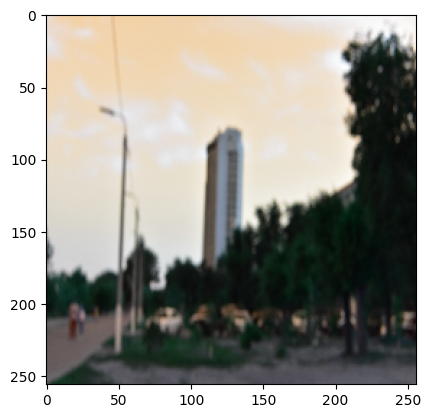

In [17]:
plt.imshow(x_train[56])

In [4]:

plt.imshow(y_train[56])

NameError: ignored

In [25]:
history = model.fit(
    x_train, y_train, batch_size=16, epochs=1, verbose=1, validation_data=(x_test,y_test)
)

16/16 [==============================] - 203s 12s/step - loss: 0.0770 - val_loss: 0.0581


In [27]:
deblurred_img=model.predict(x_test)

4/4 [==============================] - 11s 2s/step


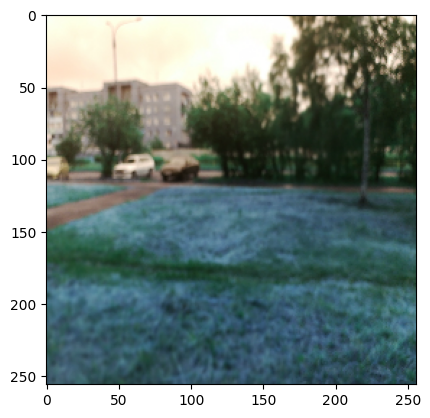

In [28]:
plt.imshow(x_test[65])

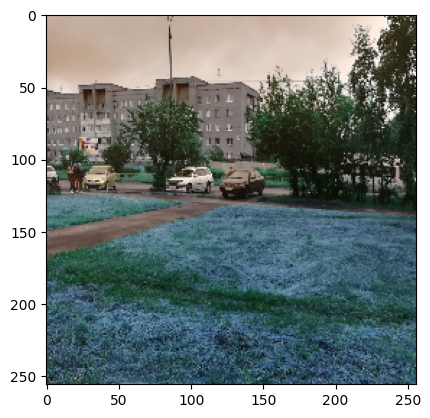

In [29]:

plt.imshow(y_test[65])

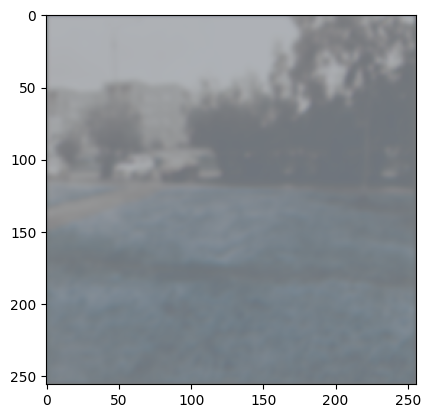

In [30]:

plt.imshow(deblurred_img[65])